In [1]:
# Copyright (c) 2023, ISCS, Wenjie Zhang.
#
# This source code is licensed under the MIT license found in the
# LICENSE file in the root directory of this source tree.

from __future__ import absolute_import, division, print_function, unicode_literals

import argparse

# miscellaneous
import builtins
import datetime
import json
import sys
import time

# onnx
# The onnx import causes deprecation warnings every time workers
# are spawned during testing. So, we filter out those warnings.
import warnings

# numpy
import numpy as np
import sklearn.metrics

# pytorch
import torch
import torch.nn as nn

from dsmeasure.core.abstract_operator import AbstractOperatorConfig, AbstractOperator
from dsmeasure.common_operators.op_common import OpStaticComputational, OpStaticNonComputational
from dsmeasure.common_operators.op_config import OperatorComputationalConfig, OperatorNonComputationalConfig, OperatorCustomConfig
from dsmeasure.core.operator_manager import OperatorManager
from dsmeasure.core.device_manager import DeviceManager
from dsmeasure.device.gpu import DeviceCUDAConfig
from models import linear_simple
from models import layer2linear

from dsmeasure.core.engine import CostEngine

In [2]:

# ls_ = linear_simple.Linear2Layer(OperatorCustomConfig(op_uid=0, op_name="linear_simple"))
# _oid, _op = OperatorManager().register(ls_)
# print(_oid)
# print(OperatorManager().find(_oid))

layer = layer2linear.Linear2Network(OperatorCustomConfig(op_uid=0, op_name="layer2linear"))
OperatorManager().register(layer)
print(layer)

DeviceManager().register(DeviceCUDAConfig(memory_max_capacity=1000, memory_limit_capacity=1000))

CostEngine().evaluation(10, [layer._config.op_uid])

<operator- 65, cuda_malloc_init> 
<operator- 66, cuda_malloc_linear1> 
<operator- 67, linear1> <operator- 68, cuda_malloc_linear2> 
<operator- 69, linear2> 
<operator- 70, relu > 
<operator- 71, cuda_malloc_relu_gradin> 
<operator- 72, relu_backward> 
<operator- 73, cuda_malloc_linear2_gradin> <operator- 74, cuda_free_linear2> 
<operator- 75, linear2_backward> 
<operator- 76, cuda_free_linear1> <operator- 77, cuda_free_relu_gradin> <operator- 78, cuda_malloc_linear1_gradin> 
<operator- 79, linear1_backward> 
<operator- 80, cuda_free_linear1_gradin> <operator- 81, cuda_free_linear2_gradin> 


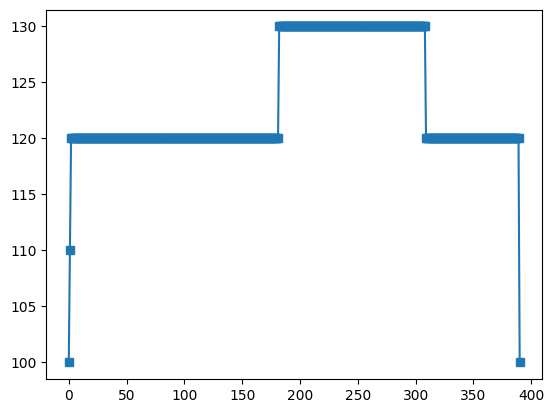

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(range(len(CostEngine().cuda_memory_trace))), CostEngine().cuda_memory_trace, 's-')